In [25]:
import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

print( 'python', sys.version)
print('pandas', pd.__version__)
print("Importações Completas!!!")

python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas 1.1.3
Importações Completas!!!


Foi necessário faxer downgrade do matplot para conseguir rodar o grafico

In [26]:
usuarios =  [
    {'id': 0, 'nome': 'Zero'},
    {'id': 1, 'nome': 'Um'},
    {'id': 2, 'nome': 'Dois'},
    {'id': 3, 'nome': 'Tres'},
    {'id': 4, 'nome': 'Quatro'},
    {'id': 5, 'nome': 'Cinco'},
    {'id': 6, 'nome': 'Seis'},
    {'id': 7, 'nome': 'Sete'},
    {'id': 8, 'nome': 'Oito'},
    {'id': 9, 'nome': 'Nove'},
]
relacionamentos = [(0,1),(0,2),(1,2),(1,3),(2,3),(3,4),
                    (4,5),(5,6),(5,7),(6,8),(7,8),(8,9)]

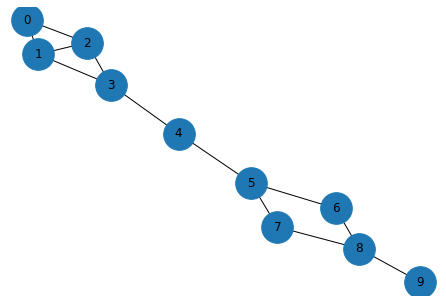

In [27]:
df_usuarios = pd.DataFrame(usuarios)
df_relacionamentos = pd.DataFrame(relacionamentos,columns=['node1','node2'])
g = nx.from_pandas_edgelist(df_relacionamentos, 'node1', 'node2', create_using=nx.Graph())

# plota o grafo
nx.draw(g, with_labels=True,  node_size = 1000)
plt.show()

In [28]:
for user in usuarios:
    user["amigos"] = []
usuarios

[{'id': 0, 'nome': 'Zero', 'amigos': []},
 {'id': 1, 'nome': 'Um', 'amigos': []},
 {'id': 2, 'nome': 'Dois', 'amigos': []},
 {'id': 3, 'nome': 'Tres', 'amigos': []},
 {'id': 4, 'nome': 'Quatro', 'amigos': []},
 {'id': 5, 'nome': 'Cinco', 'amigos': []},
 {'id': 6, 'nome': 'Seis', 'amigos': []},
 {'id': 7, 'nome': 'Sete', 'amigos': []},
 {'id': 8, 'nome': 'Oito', 'amigos': []},
 {'id': 9, 'nome': 'Nove', 'amigos': []}]

In [29]:
for i, j in relacionamentos:
    # isso funciona porque users[i] é o usuário cuja id é i
    usuarios[i]["amigos"].append(usuarios[j]) # adiciona i como um amigo de j
    usuarios[j]["amigos"].append(usuarios[i]) # adiciona j como um amigo de i
df_usuarios = pd.DataFrame(usuarios)
df_usuarios

,id,nome,amigos
0,0,Zero,"[{'id': 1, 'nome': 'Um', 'amigos': [{'id': 0, ..."
1,1,Um,"[{'id': 0, 'nome': 'Zero', 'amigos': [{'id': 1..."
2,2,Dois,"[{'id': 0, 'nome': 'Zero', 'amigos': [{'id': 1..."
3,3,Tres,"[{'id': 1, 'nome': 'Um', 'amigos': [{'id': 0, ..."
4,4,Quatro,"[{'id': 3, 'nome': 'Tres', 'amigos': [{'id': 1..."
5,5,Cinco,"[{'id': 4, 'nome': 'Quatro', 'amigos': [{'id':..."
6,6,Seis,"[{'id': 5, 'nome': 'Cinco', 'amigos': [{'id': ..."
7,7,Sete,"[{'id': 5, 'nome': 'Cinco', 'amigos': [{'id': ..."
8,8,Oito,"[{'id': 6, 'nome': 'Seis', 'amigos': [{'id': 5..."
9,9,Nove,"[{'id': 8, 'nome': 'Oito', 'amigos': [{'id': 6..."


In [33]:
def number_of_friends(user):
    """quantos amigos o usuário tem?"""
    return len(user["amigos"])
total_connections = sum(number_of_friends(user) for user in usuarios)
total_connections

24

In [35]:
num_users = len(usuarios) # tamanho da lista de usuários
avg_connections = total_connections / num_users # 2.4
avg_connections

2.4